# Activation and Output Functions
In this exercise, you'll explore how activation functions and output functions impact the ability of neural networks to learn. 

Most of the code will be provided for you, and you'll have to fill in the blanks! 
Consider trying a few different combinations of activation functions to get a better idea of how the activation function impacts training.

In [ ]:
#DO NOT EDIT THIS CELL
#Run this cell to install required packages.

!pip install ipywidgets

#Next, click the jupyter icon, select the STARTER file, and shutdown.
#Then, return to the STARTER file. 

In [1]:
# DO NOT EDIT THIS CELL
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import ipywidgets

## Loading Data
We use the [CIFAR-10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) dataset from the `torchvision` module and wrap the training and test datasets in a DataLoader. 

We also create a `train_network` function that takes a PyTorch neural network, a train DataLoader, and a test DataLoader.

This code has been provided for you.

In [6]:
# Establish our transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load train and test datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

# Create the training and test dataloaders with a batch size of 32
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
# This code is provided for you. 
# Feel free to look it over but if you modify it, it may break!
def train_network_classification(net, train_loader, test_loader):
    num_epochs = 10
    
    # We'll use Negative Log Likelihood Loss as our objective function here. Leave it fixed for now.
    criterion = nn.NLLLoss()

    # Don't worry about the choice of optimizer here. Leave it fixed for now.
    optimizer = optim.SGD(mlp.parameters(), lr=0.005, momentum=0.9)
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        train_correct = 0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).sum().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()
    
def train_network_regression(net, train_loader, test_loader):
    num_epochs = 10
    
    criterion = nn.L1Loss(reduction='sum')

    # Don't worry about the choice of optimizer here. Leave it fixed for now.
    optimizer = optim.SGD(mlp.parameters(), lr=0.05)
    
    # Establish a list for our history
    train_loss_history = list()
    val_loss_history = list()

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0.0
        for i, data in enumerate(train_loader):
            # data is a list of [inputs, labels]
            inputs, labels = data
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss)

        val_loss = 0.0
        net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation loss: {val_loss/len(test_loader):.5f}')
        val_loss_history.append(val_loss)           

    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

## Defining a Neural Network
The first model we establish is a fully-connected neural network -- a multi-layer perceptron. 
You will specify the activation and output function for the network based on the task -- a 10-class image classification task.

If you need to, consult the [PyTorch documentation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions) for the activation and output function options available to you.

**NOTE:** When choosing your activation and output functions, omit the parentheses in the assignment to the class property.

In [8]:
class CIFAR_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        # TASK: compare different functions
        self.activation = F.relu
        self.output = F.softmax
        self.fc1 = nn.Linear(32 * 32 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x)) # For some output functions, may need to specify dimension.
        return x

# Do not change the name of your model or later cells may fail!
mlp = CIFAR_MLP()

/var/folders/_w/9ltrq4ys4053jkl_ntftqb0r0000gn/T/ipykernel_13364/3796846988.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(self.fc3(x)) # For some output functions, may need to specify dimension.


Epoch 1 training accuracy: 7.32% training loss: -0.20316
Epoch 1 validation accuracy: 9.14% validation loss: -0.27272
Epoch 2 training accuracy: 10.20% training loss: -0.30838
Epoch 2 validation accuracy: 10.79% validation loss: -0.33033
Epoch 3 training accuracy: 11.39% training loss: -0.34781
Epoch 3 validation accuracy: 11.74% validation loss: -0.36027
Epoch 4 training accuracy: 12.42% training loss: -0.37955
Epoch 4 validation accuracy: 12.79% validation loss: -0.39113
Epoch 5 training accuracy: 13.18% training loss: -0.40316
Epoch 5 validation accuracy: 13.27% validation loss: -0.40659
Epoch 6 training accuracy: 13.60% training loss: -0.41874
Epoch 6 validation accuracy: 13.56% validation loss: -0.41742
Epoch 7 training accuracy: 14.06% training loss: -0.43333
Epoch 7 validation accuracy: 13.77% validation loss: -0.42548
Epoch 8 training accuracy: 14.45% training loss: -0.44527
Epoch 8 validation accuracy: 13.90% validation loss: -0.42959
Epoch 9 training accuracy: 14.77% training

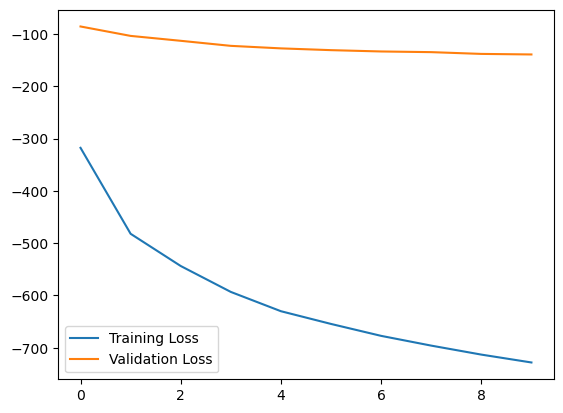

In [9]:
# Now let's train our network!
train_network_classification(mlp, train_loader, test_loader)

## Regression Tasks
In a regession task, we'll need to think about something else -- our same model may not work! 
For this task, we'll use the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

Again, if you get stuck on your choices of activation function, check out [the documentation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions).
This network looks a bit different -- why do we not have an output function for this task?

In [10]:
# Load our data and split it into train and test sets
data, target = fetch_california_housing(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3)

# Since we are using PyTorch, we need tensors!
train_x = torch.tensor(train_x, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

# Then we convert those tensors to a TensorDataset
train_california = torch.utils.data.TensorDataset(train_x, train_y)
test_california = torch.utils.data.TensorDataset(test_x, test_y)

# And create our DataLoaders!
train_loader = DataLoader(train_california, batch_size=10, shuffle=True)
test_loader = DataLoader(test_california, batch_size=10)

In [11]:
class Housing_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        # TASK: try different activation functions
        self.activation = F.relu
        self.hidden = nn.Linear(8, 2)
        self.prediction = nn.Linear(2, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.prediction(x)

        return x

# Do not change the name of your model or later cells may fail!
mlp = Housing_MLP()

/Users/anthony/miniconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Users/anthony/miniconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1 training loss: 256.67341
Epoch 1 validation loss: 187.54643


/Users/anthony/miniconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 2 training loss: 226.60596
Epoch 2 validation loss: 149.61263
Epoch 3 training loss: 234.27418
Epoch 3 validation loss: 99.42314
Epoch 4 training loss: 248.39495
Epoch 4 validation loss: 171.91324
Epoch 5 training loss: 238.09910
Epoch 5 validation loss: 99.42314
Epoch 6 training loss: 246.66156
Epoch 6 validation loss: 93.20277
Epoch 7 training loss: 249.64250
Epoch 7 validation loss: 89.50724
Epoch 8 training loss: 220.07119
Epoch 8 validation loss: 88.30640
Epoch 9 training loss: 227.55648
Epoch 9 validation loss: 90.28964
Epoch 10 training loss: 235.91558
Epoch 10 validation loss: 99.42317


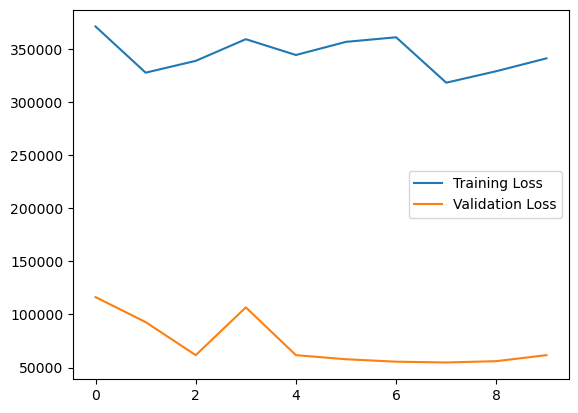

In [12]:
# Now let's train our network!
train_network_regression(mlp, train_loader, test_loader)

Great work! Go back and try different activation and output functions throughout and see how it affects your results.